In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [2]:
# функция для оценки качества модели
def evaluate_preds(true_values, pred_values):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 600000], [0, 600000], linestyle='--', color='black')
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')

    plt.show()

In [3]:
data = pd.read_csv('train_prep.csv', header=0)
data.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,0,33,7976,5,0,11,0,184966.930730
1,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,0,46,10309,1,1,16,0,300009.450063
2,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,0,0,34,7759,0,1,3,0,220925.908524
3,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,0,23,5735,3,0,5,0,175616.227217
4,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,0,35,5776,1,2,4,0,150226.531644


In [4]:
x = data.drop(['Price'], axis=1)
y = data['Price']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### SVR 

In [7]:
clf = SVR(C=600000)

In [8]:
clf.fit(x_train, y_train)

SVR(C=600000)

In [9]:
y_pred = clf.predict(x_test)

R2:	0.717
MAE:	30272.319
MSE:	2554724179.012


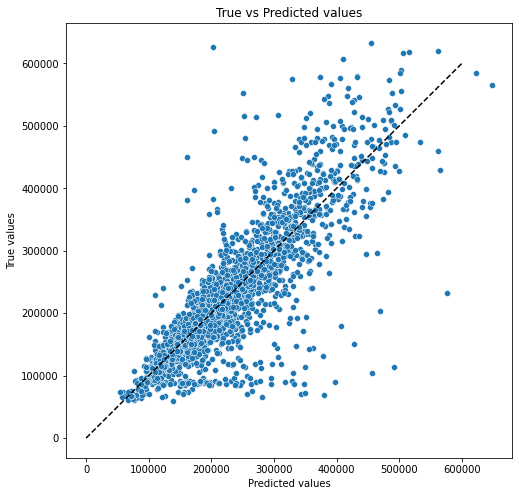

In [10]:
evaluate_preds(y_test, y_pred)

In [11]:
base_r2 = r2(y_test, y_pred)
base_r2

0.7166902912074833

In [45]:
def feature_weight_check(model, data):
  y = data['Price']
  for column in data.columns[:-1]:
    df = data.copy()
    df[column] = df[column].sample(frac=1).reset_index(drop=True)
    x = df.drop(['Price'], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'{column}:\t {base_r2 - r2(y_test, y_pred)}, R2: {r2(y_test, y_pred)}\n')

### Random Forest Regressor

In [26]:
clf = RandomForestRegressor(max_depth=14, max_features=6, n_estimators=300)

In [27]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=14, max_features=6, n_estimators=300)

R2:	0.74
MAE:	28800.317
MSE:	2341373810.743


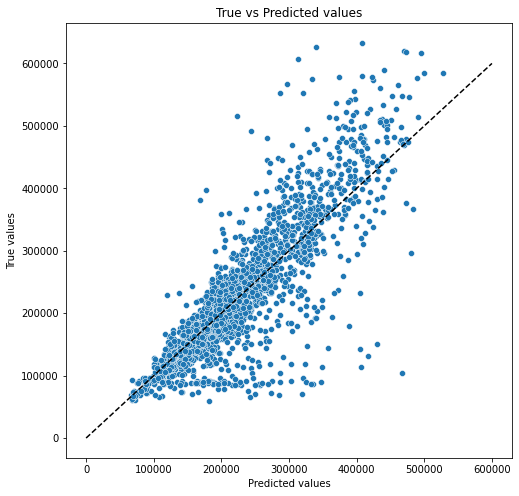

In [28]:
y_pred = clf.predict(x_test)
evaluate_preds(y_test, y_pred)

In [31]:
base_r2 = r2(y_test, y_pred)
base_r2

0.7403500785150932

In [30]:
feature_weight_check(clf)

Rooms:	 -0.0028621478049966065, R2: 0.7432122263200898

Square:	 0.02638322148894079, R2: 0.7139668570261524

LifeSquare:	 -0.0016696698402798305, R2: 0.742019748355373

KitchenSquare:	 0.00543562336415182, R2: 0.7349144551509413

Floor:	 0.0024066866193253045, R2: 0.7379433918957679

HouseFloor:	 0.0019721739053721876, R2: 0.738377904609721

HouseYear:	 0.007672453986135919, R2: 0.7326776245289572

Ecology_1:	 0.011961042672636646, R2: 0.7283890358424565

Ecology_2:	 -0.0011674907393273148, R2: 0.7415175692544205

Ecology_3:	 -0.0006508656656321055, R2: 0.7410009441807253

Social_1:	 -0.001085857960242631, R2: 0.7414359364753358

Social_2:	 0.0017749056433711274, R2: 0.738575172871722

Social_3:	 0.020913710379549366, R2: 0.7194363681355438

Helthcare_2:	 -0.0009724502344763408, R2: 0.7413225287495695

Shops_1:	 0.0011703863555234673, R2: 0.7391796921595697

Shops_2:	 -0.0022537206880339777, R2: 0.7426037992031271



Попробуем убрать все призаки с отрицательными значениями весов

In [32]:
features_to_drop = ['Shops_2', 'Helthcare_2', 'Social_1', 'Ecology_3', 'Ecology_2', 'LifeSquare', 'Rooms']
df = data.drop(features_to_drop, axis=1)
df.head()

,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_2,Social_3,Shops_1,Price
0,47.981561,6.0,7,9.0,1969,0.089040,7976,5,11,184966.930730
1,65.683640,8.0,7,9.0,1978,0.000070,10309,1,16,300009.450063
2,44.947953,6.0,8,12.0,1968,0.049637,7759,0,3,220925.908524
3,53.352981,9.0,8,17.0,1977,0.437885,5735,3,5,175616.227217
4,39.649192,7.0,11,12.0,1976,0.012339,5776,1,4,150226.531644


т.к. для леса можно не масштабировать данные, попробуем без скейлера

In [33]:
x = data.drop(['Price'], axis=1)
y = data['Price']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [35]:
clf = RandomForestRegressor(max_depth=14, max_features=6, n_estimators=300)
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=14, max_features=6, n_estimators=300)

R2:	0.741
MAE:	28772.006
MSE:	2331333732.017


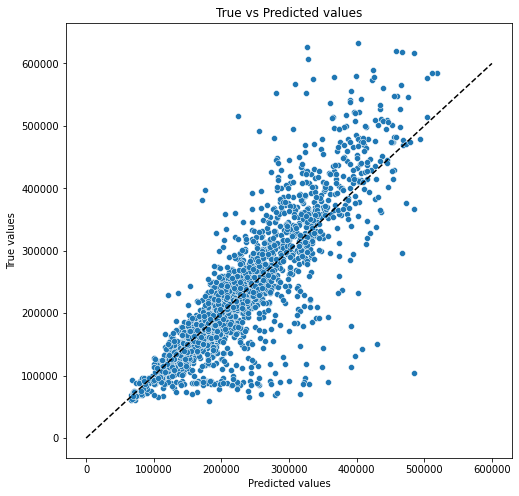

In [36]:
y_pred = clf.predict(x_test)
evaluate_preds(y_test, y_pred)

Убрав всё, 

результат улучшиллся незначительно, попробуем убрать Rooms и прогнать ещё раз

In [41]:
df = data.drop(['Rooms'], axis=1)
x = df.drop(['Price'], axis=1)
y = df['Price']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [43]:
clf = RandomForestRegressor(max_depth=14, max_features=6, n_estimators=300)

In [46]:
feature_weight_check(clf, df)

Square:	 0.0499540099069431, R2: 0.6903960686081501

LifeSquare:	 -0.002208641974784653, R2: 0.7425587204898778

KitchenSquare:	 0.0027375367519222316, R2: 0.7376125417631709

Floor:	 -0.004388134892252982, R2: 0.7447382134073461

HouseFloor:	 0.0017684188312981908, R2: 0.738581659683795

HouseYear:	 0.009210075685373242, R2: 0.7311400028297199

Ecology_1:	 0.008442190979002229, R2: 0.7319078875360909

Ecology_2:	 -0.0024171809675519462, R2: 0.7427672594826451

Ecology_3:	 -0.002465515002417318, R2: 0.7428155935175105

Social_1:	 -0.0028329128842004003, R2: 0.7431829913992936

Social_2:	 -0.0026437071099052467, R2: 0.7429937856249984

Social_3:	 0.019160920183914687, R2: 0.7211891583311785

Helthcare_2:	 -0.0025005467887714294, R2: 0.7428506253038646

Shops_1:	 -0.0010649993292732862, R2: 0.7414150778443664

Shops_2:	 -0.0039039255752528756, R2: 0.744254004090346



In [47]:
df = data.drop(['Rooms', 'Floor', 'Shops_2'], axis=1)
x = df.drop(['Price'], axis=1)
y = df['Price']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [49]:
clf = RandomForestRegressor(max_depth=14, max_features=6, n_estimators=300)

In [50]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [51]:
base_r2 = r2(y_test, y_pred)
base_r2

0.743853320315762

In [52]:
feature_weight_check(clf, df)

Square:	 0.051933699623596175, R2: 0.6919196206921658

LifeSquare:	 0.0031093853436100494, R2: 0.740743934972152

KitchenSquare:	 0.0062915060784923815, R2: 0.7375618142372696

HouseFloor:	 0.00921967417673275, R2: 0.7346336461390293

HouseYear:	 0.010217430293208762, R2: 0.7336358900225532

Ecology_1:	 0.012510175900891207, R2: 0.7313431444148708

Ecology_2:	 0.0012366915655560584, R2: 0.742616628750206

Ecology_3:	 0.0019326652257358745, R2: 0.7419206550900261

Social_1:	 0.005433972602633119, R2: 0.7384193477131289

Social_2:	 0.0010186721205185378, R2: 0.7428346481952435

Social_3:	 0.022741777304715827, R2: 0.7211115430110462

Helthcare_2:	 0.0017150391106930396, R2: 0.742138281205069

Shops_1:	 0.002333659369217145, R2: 0.7415196609465449



Убрали все незначительные признаки и получили лучший r2 = 0.744. Незначительными оказались признаки Rooms, Floor, Shop_2

С SVR подобного исследования не получилось, т.к. модель обучается очень долго

Вывод с нашими данными лучше всего работает модель Random Forest Regressor